## Case study 1

### About the Data set (Wine Quality.csv)
Attribute Information:

The dataset are related to red and white variants of the "Vinho Verde" wine. Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer). 

    1 - fixed acidity 
    2 - volatile acidity 
    3 - citric acid 
    4 - residual sugar 
    5 - chlorides 
    6 - free sulfur dioxide 
    7 - total sulfur dioxide 
    8 - density 
    9 - pH 
    10 - sulphates 
    11 - alcohol Output variable (based on sensory data): 
    12 - quality (score between 0 and 10)

## 1. Load the libraries:

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox, f_oneway


## 2. Importing the dataset(Titanic train.csv):

In [152]:
wines  = pd.read_csv('Wine_data.csv')
wines .head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


## 3.EDA Descriptive Statistics:

### 3.1.  Measures of Central Tendency

Measures of Central Tendency define significant, representative and adequate values for a set of data, depending on what you want to analyze. They are the 

1. mean
2. median
3. quantiles and mode.

### 3.2 Check the  mean ,Mode, Median and Quantile for dataset?

#### Mean

In [153]:
wines.mean()


fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

#### Mode

In [154]:
wines.mode()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.28,0.3,1.2,0.044,29.0,111.0,0.992,3.14,0.5,9.4,6


#### Median and Quantile

In [155]:
train_df.median()

fixed acidity             6.80000
volatile acidity          0.26000
citric acid               0.32000
residual sugar            5.20000
chlorides                 0.04300
free sulfur dioxide      34.00000
total sulfur dioxide    134.00000
density                   0.99374
pH                        3.18000
sulphates                 0.47000
alcohol                  10.40000
quality                   6.00000
dtype: float64

### 3.4 check (Quantile 25%,50%,75%) for dataset

#### Quantile 25%

In [156]:
wines.quantile(q=0.25)

fixed acidity             6.300000
volatile acidity          0.210000
citric acid               0.270000
residual sugar            1.700000
chlorides                 0.036000
free sulfur dioxide      23.000000
total sulfur dioxide    108.000000
density                   0.991723
pH                        3.090000
sulphates                 0.410000
alcohol                   9.500000
quality                   5.000000
Name: 0.25, dtype: float64


#### Quantile 50%

In [157]:
wines.quantile(q=0.50)

fixed acidity             6.80000
volatile acidity          0.26000
citric acid               0.32000
residual sugar            5.20000
chlorides                 0.04300
free sulfur dioxide      34.00000
total sulfur dioxide    134.00000
density                   0.99374
pH                        3.18000
sulphates                 0.47000
alcohol                  10.40000
quality                   6.00000
Name: 0.5, dtype: float64

#### Quantile 75%

In [158]:
wines.quantile(q=0.75)

fixed acidity             7.3000
volatile acidity          0.3200
citric acid               0.3900
residual sugar            9.9000
chlorides                 0.0500
free sulfur dioxide      46.0000
total sulfur dioxide    167.0000
density                   0.9961
pH                        3.2800
sulphates                 0.5500
alcohol                  11.4000
quality                   6.0000
Name: 0.75, dtype: float64

## 4. Measures of Dispersion

Measures of Dispersion are measures that indicate how spread the data is, or how they vary. The measures of dispersion are range, variance, standard deviation and the absolute deviation, or mean absolute deviation.

### 4.1 check the Range,Variance,Standard Deviation,Absolute Deviation or Mean Absolute Deviation?

#### Range

In [159]:
print(wines.max() - wines.min())

fixed acidity            10.40000
volatile acidity          1.02000
citric acid               1.66000
residual sugar           65.20000
chlorides                 0.33700
free sulfur dioxide     287.00000
total sulfur dioxide    431.00000
density                   0.05187
pH                        1.10000
sulphates                 0.86000
alcohol                   6.20000
quality                   6.00000
dtype: float64


#### Variance

In [160]:
print(wines.var())

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
dtype: float64


#### Standard Deviation

In [161]:
print(wines.std())

fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.885639
dtype: float64


#### Absolute Deviation or Mean Absolute Deviation

In [162]:
print(wines.mad())

fixed acidity            0.644923
volatile acidity         0.073803
citric acid              0.086411
residual sugar           4.227788
chlorides                0.011462
free sulfur dioxide     13.149156
total sulfur dioxide    34.282442
density                  0.002447
pH                       0.118204
sulphates                0.087504
alcohol                  1.034213
quality                  0.670793
dtype: float64


## 5. Covariance and Correlation

1. Covariance is a numerical measure that indicates the inter-dependency between two variables. 
2. Covariance indicates how two variables behave together in relation to their averages. 
3. A covariance of 0 indicates that the variables are totally independant, while a high and positive covariance value means that a variable is big when the other is big. Analogously, a negative covariance with a high absolute value means that one variable is big when the other is small.
4. Covariance can be calculated through the cov() function. 

### 5.1 Check the Covariance and Correlation scores . write your Observations?

#### Covariance

In [163]:
print(wines.cov())

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              0.712114         -0.001931     0.029533   
volatile acidity          -0.001931          0.010160    -0.001823   
citric acid                0.029533         -0.001823     0.014646   
residual sugar             0.381022          0.032865     0.057829   
chlorides                  0.000426          0.000155     0.000302   
free sulfur dioxide       -0.708919         -0.166300     0.193630   
total sulfur dioxide       3.266013          0.382354     0.622989   
density                    0.000670          0.000008     0.000054   
pH                        -0.054265         -0.000486    -0.002992   
sulphates                 -0.001651         -0.000411     0.000861   
alcohol                   -0.125533          0.008400    -0.011278   
quality                   -0.084947         -0.017382    -0.000987   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

#### Observation:
    * hard to be understood and compared, because it gives us values in different scales as the variables change. 
    * For a better comparison, we normalize covariance to a value that will always be between -1 and 1, so it can be better understood

#### Correlation

In [164]:
print(wines.corr())

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

#### Observation:
    
1. This value is the correlation. Correlation is always between -1, a perfect anti-correlation, and 1, perfect correlation
2. Finally, it is also important to note the famous concept that says that “correlation does not imply causation”.

### 6.1 check the dataset.describe()?

In [165]:
train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### 6.2 Create the numeric_features

In [166]:
numeric_features = list(wines.dtypes[(wines.dtypes != "str") & (wines.dtypes !='object')].index)


#### 6.3 Create the skewed_features = wines[numeric_features]

In [167]:
skewed_features = wines[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)


#### 6.4 Create DataFrame for skewness?

In [168]:
#compute skewness
skewness = pd.DataFrame({'Skew' :skewed_features})   



#### 6.7 Create to Get only higest skewed = [abs(skewness) > 0.7] features?

In [169]:
# Get only higest skewed features
skewness = skewness[abs(skewness) > 0.7]
skewness = skewness.dropna()
print ("There are {} higest skewed numerical features to box cox transform".format(skewness.shape[0]))


There are 7 higest skewed numerical features to box cox transform


#### 6.8 Create skewness.index and new skewed_features2

In [170]:
#Create Empty list 
l_opt = {}

#create for loop for skewness.index
for feat in skewness.index:
    wines[feat], l_opt[feat] = boxcox((wines[feat]+1))
    
#create skewed_features2 for skewness.index
skewed_features2 = wines[skewness.index].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)


#### 6.9 Create new DataFrame for skewed_features2?

In [171]:
#compute skewness
skewness2 = pd.DataFrame({'New Skew' :skewed_features2}) 

# concat both skewness, skewness2
display(pd.concat([skewness, skewness2], axis=1).sort_values(by=['Skew'], ascending=False))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Skew,New Skew
chlorides,5.021792,-0.066460
volatile acidity,1.576497,0.008622
free sulfur dioxide,1.406314,0.026987
citric acid,1.281528,-0.074555
residual sugar,1.076764,0.001397
density,0.977474,0.322584
sulphates,0.976894,0.010200


#### Observations:
    1. we were able at first to bring most the numerical values closer to normal.
    2. We created nwe skew as per column type.
    3. We clrealy showing the reducing the skewness.

### 6.10  create a QQ_plot to visualize the skewness and kurtosis . write your Observations?

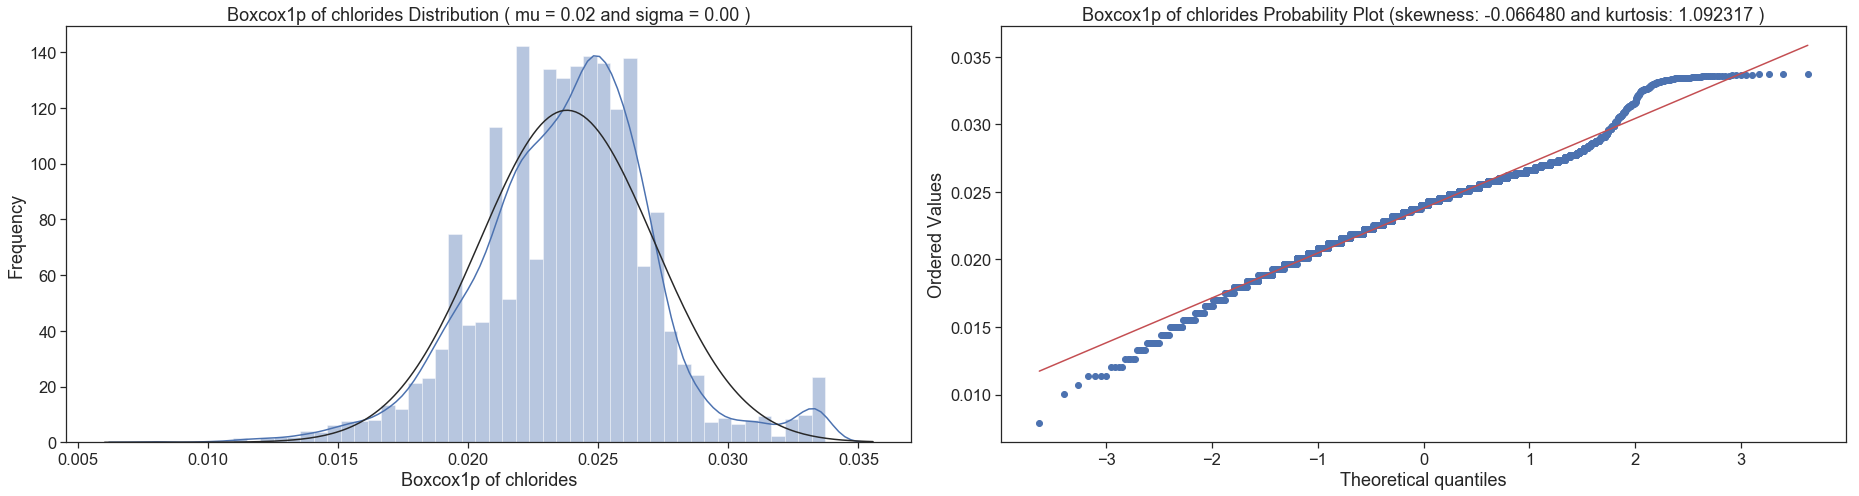

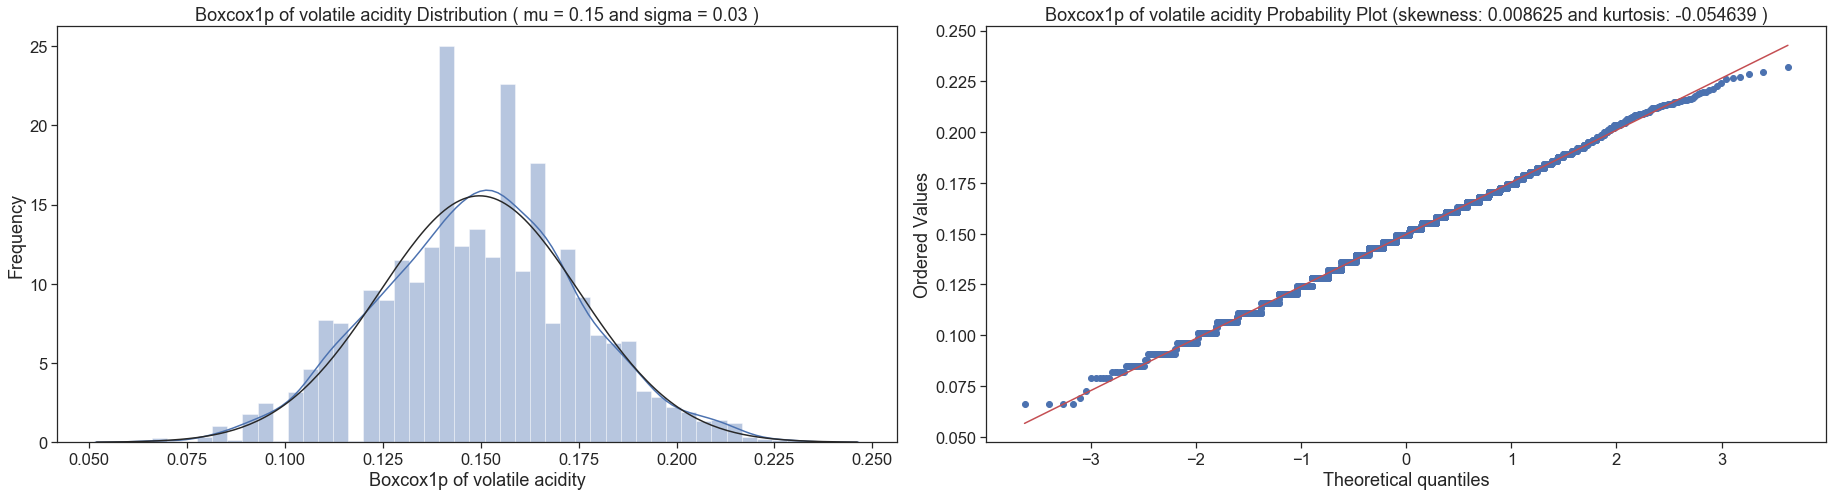

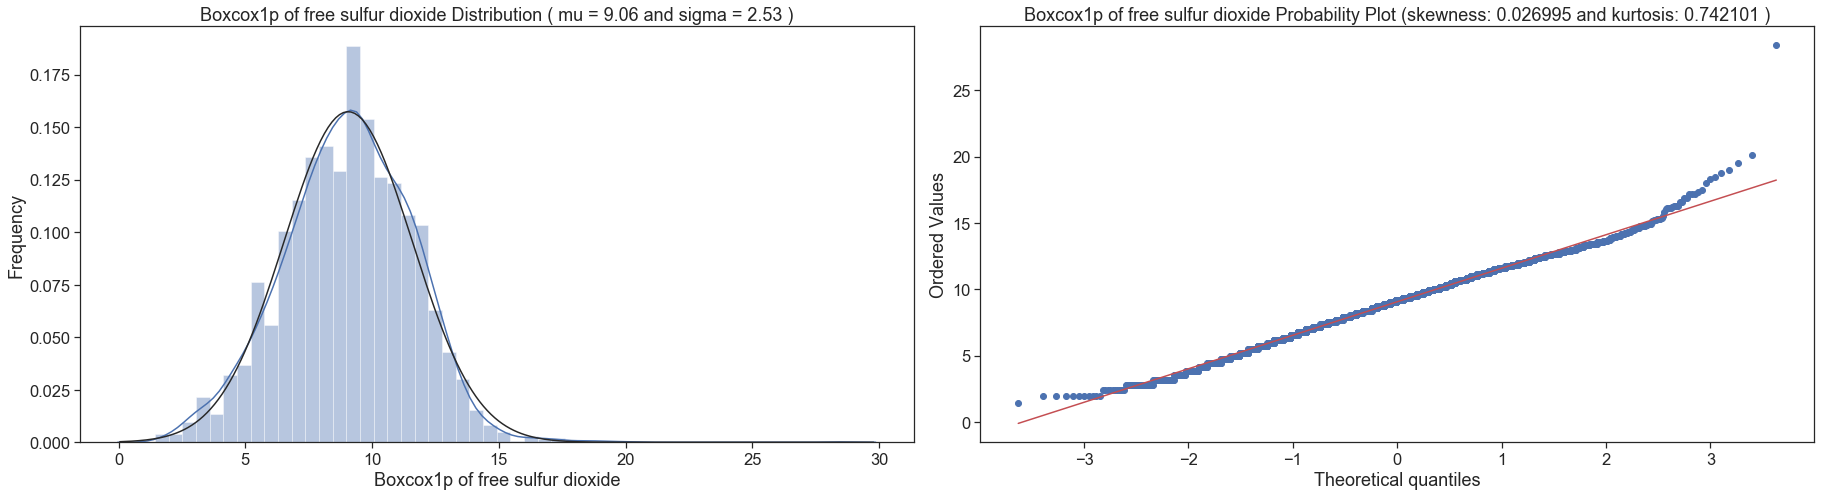

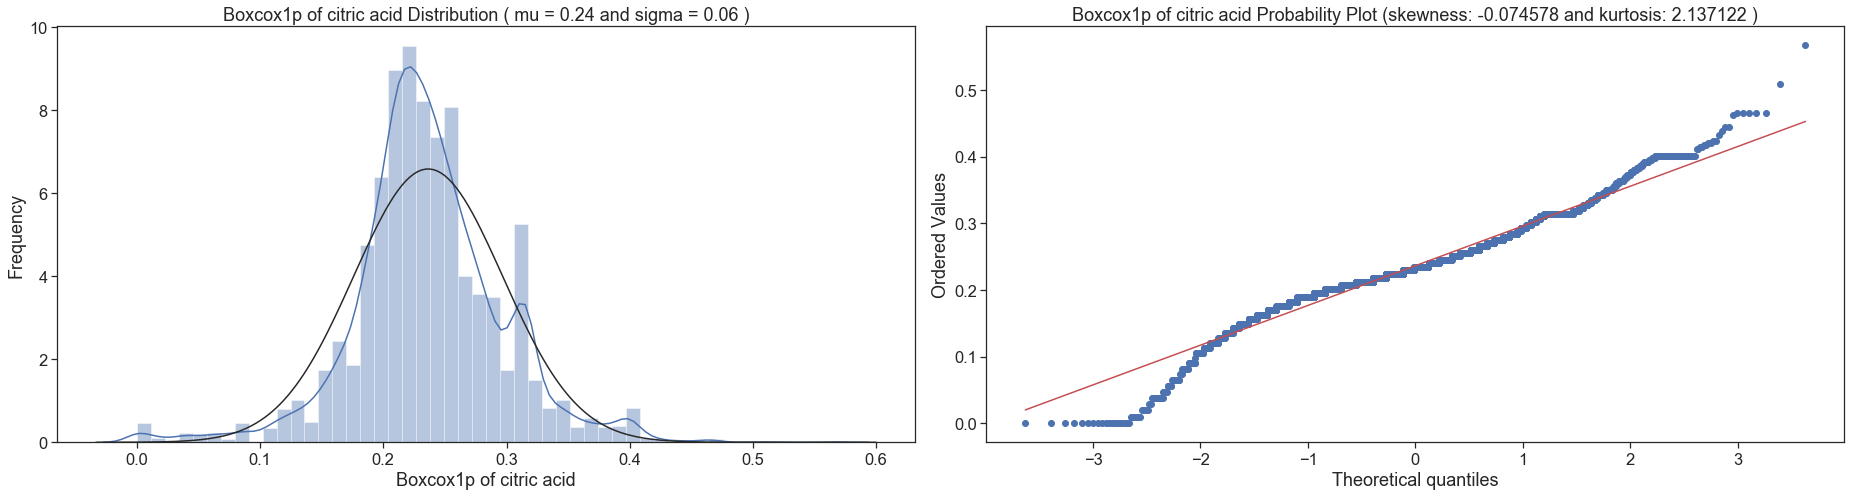

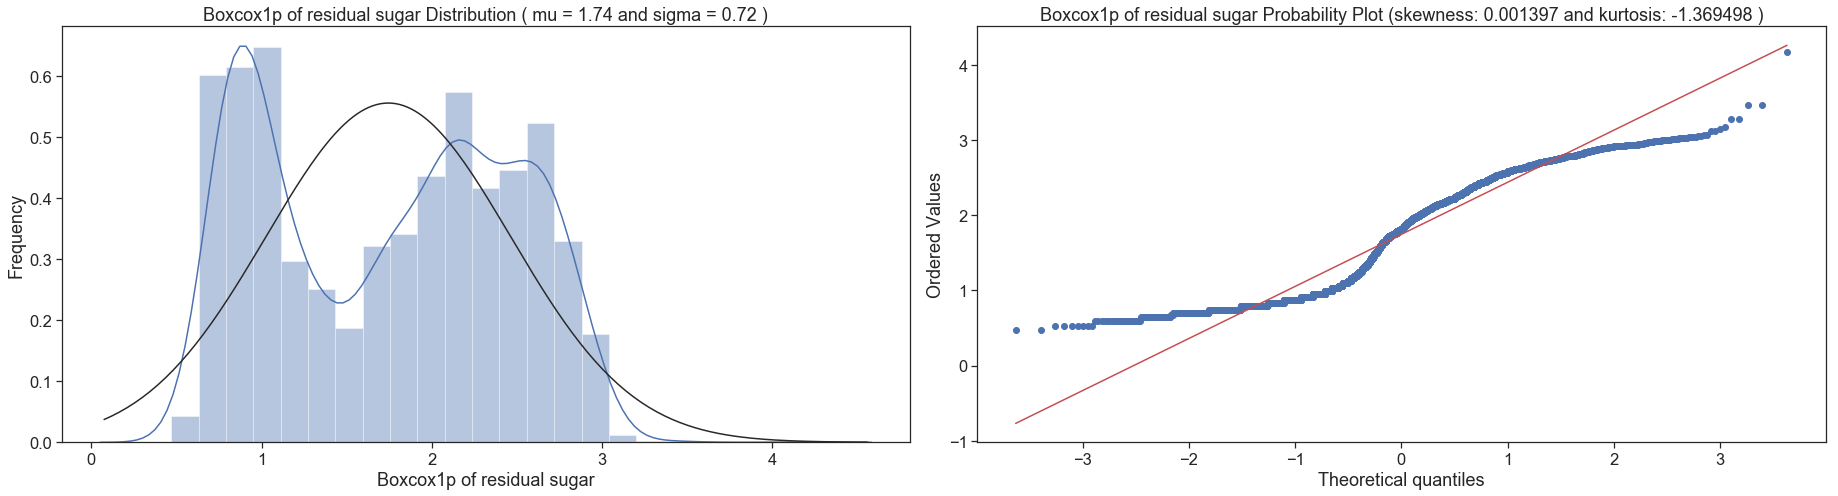

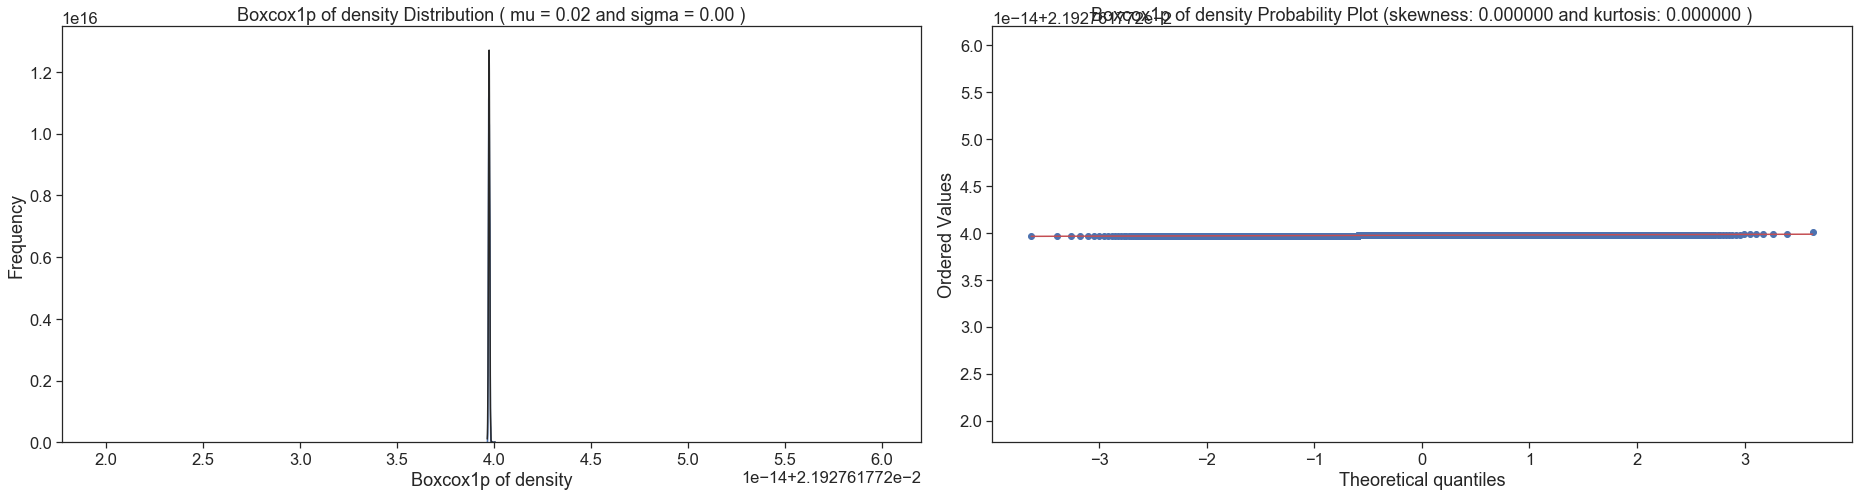

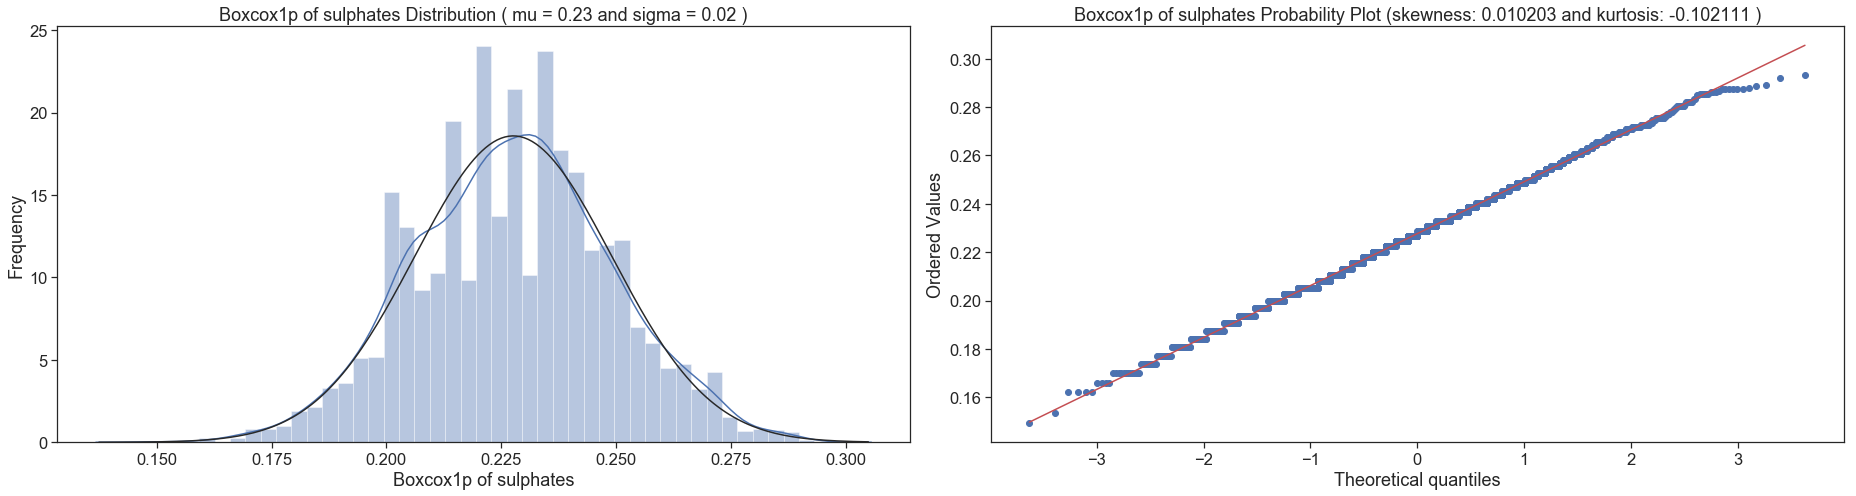

In [172]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(26,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.\
                   format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()
# create for loop for skewness.index     
for feat in skewness.index:
    QQ_plot(wines[feat], ('Boxcox1p of {}'.format(feat)))

### Observations:
As you can see, in addition to having presented significant improvements, they also pass the QQ test and present interesting distributions as we can observe in their respective graphs.

# The End